In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = pd.read_csv('../datasets/penguins.csv')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
penguins_subset = penguins.dropna(axis=0).reset_index(drop=True)

In [6]:
penguins_subset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [8]:
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])
penguins_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,False
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,False
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,True


In [9]:
penguins_subset = penguins_subset.drop(columns=['island'], axis=1)

In [10]:
X = penguins_subset.drop(['species'], axis=1)

In [11]:
X_scaled = StandardScaler().fit_transform(X)

In [12]:
inertias = []
clusters_num = [i for i in range(2, 11)]

In [13]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
    inertias.append(kmeans.inertia_)

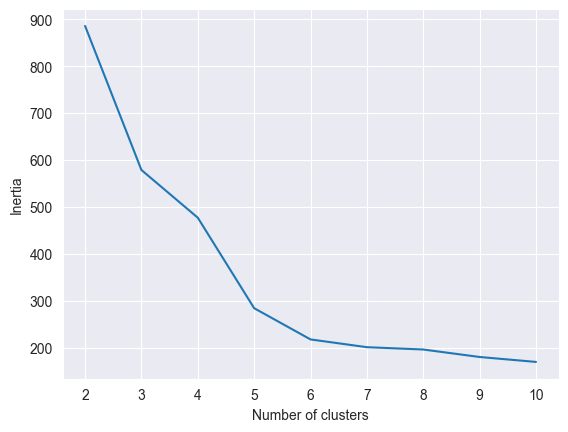

In [14]:
sns.lineplot(x=clusters_num, y=inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
def kmeans_sil(num_clusters, x_vals):

    silhouette_values = []

    for num in num_clusters:
        k_means = KMeans(n_clusters=num, random_state=42)
        k_means.fit(x_vals)
        silhouette_values.append(silhouette_score(x_vals, k_means.labels_))

    return silhouette_values


In [16]:
silhouette_values = kmeans_sil(clusters_num, X_scaled)

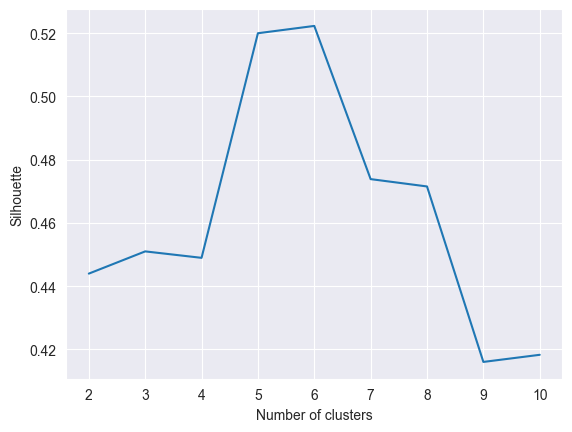

In [17]:
sns.lineplot(x=clusters_num, y=silhouette_values)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [18]:
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [19]:
np.unique(kmeans6.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [20]:
penguins_subset["cluster"] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,True,5
1,Adelie,39.5,17.4,186.0,3800.0,False,2
2,Adelie,40.3,18.0,195.0,3250.0,False,2
3,Adelie,36.7,19.3,193.0,3450.0,False,2
4,Adelie,39.3,20.6,190.0,3650.0,True,5


In [21]:
penguins_subset.groupby(["cluster", "species"]).size()

cluster  species  
0        Chinstrap    32
1        Gentoo       58
2        Adelie       73
         Chinstrap     2
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Adelie       71
dtype: int64

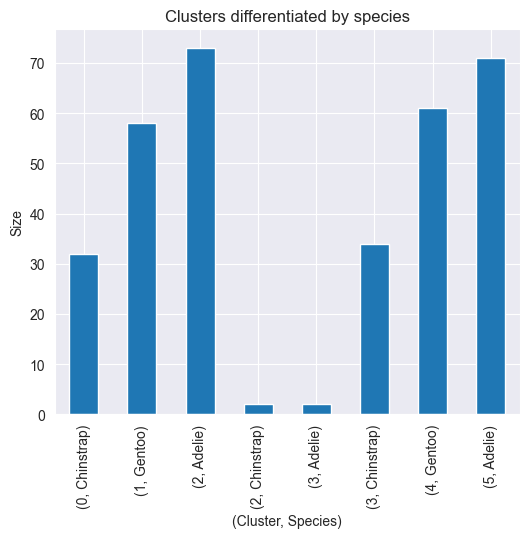

In [22]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [24]:
penguins_subset.groupby(["cluster", "species", "sex_MALE"]).size().sort_values(ascending=False)

cluster  species    sex_MALE
2        Adelie     False       73
5        Adelie     True        71
4        Gentoo     True        61
1        Gentoo     False       58
3        Chinstrap  True        34
0        Chinstrap  False       32
2        Chinstrap  False        2
3        Adelie     True         2
dtype: int64

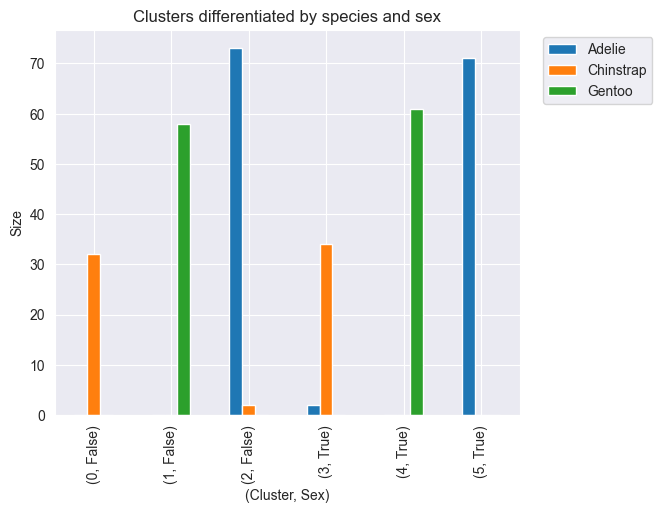

In [26]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex', figsize=(6, 5), ylabel='Size',xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()